#### <left>Бронников Максим Андреевич</left>

*M8О-307Б, №4 по списку*

#   <center>Лабораторная работа №3</center>
### <center> Задание №4 </center>

**Вычислить первую и вторую производную от таблично заданной функции $y_i = f(x_i), \; i = 0, 1, 2, 3, 4$ в точке $ x = x^{*}$.**

### <center> Вариант №4 </center>

$ y_i = 1.0, \; 1.1052, \; 1.2214, \; 1.3499, \; 1.4918 $

$ x_i = 0.0, \;  0.1, \; 0.2, \; 0.3, \; 0.4 $


$x^{*} = 0.2$

## <center> Решение: </center>

### <center> Вспомогательные функции </center>

Импортируем бибилиотеки:

In [1]:
import matplotlib.pyplot as plt
import math
import sys
import numpy as np
from functools import reduce

Функции для вычисления многочлена Ньютона $P_n(x) = f(x_0) + (x - x_0)f(x_0, x_1) + ... + (x - x_0)...(x - x_{n-1})f(x_0, ..., x_n)$:

In [2]:
_memo = {}

# Set in memo values of f(x) that we get from table
def values_set(Xi, Yi):
    _memo.clear()
    _memo.update(dict(zip(Xi, Yi)))
    
def value_add(x, y):
    _memo.update({x: y})

def f(*args):
    s = len(args) - 1
    if not s:
        return _memo[args[0]]
    elif args in _memo:
        return _memo[args]
    args1 = args[:s]
    args2 = args[1:]
    ans = (f(*args1) - f(*args2)) / (args[0] - args[s])
    _memo.update({args: ans})
    return ans

def order_mult(x, Xi, i):
    if not i:
        return 1.0
    return reduce(lambda a, b: a * b, map(lambda v: x - v, Xi[:i]))


def newton_interpol(Xi, Yi):
    values_set(Xi, Yi)
    return lambda x: sum([order_mult(x, Xi, i) * f(*tuple(Xi[:i+1])) for i in range(len(Xi))])

### <center> Численное дифференцирование </center>

Функция вычисления $m$-ой производной $ \; \left( \prod\limits_{i = 0}^{n} (x - x_i) \right)^{(m)} = \displaystyle\sum\limits_{i = 0}^{n} \left(\frac{\prod\limits_{j = 0}^{n} (x - x_j)}{(x - x_i)} \right)^{(m - 1)} $ от произведения $\prod\limits_{i = 0}^{n} (x - x_i)$:

In [3]:
def differ_order_mult(x, Xi, i, n):
    if not n:
        return order_mult(x, Xi, i)
    return sum([differ_order_mult(x, Xi[:j] + Xi[j+1:], i - 1, n - 1) for j in range(i)])

Функция вычисления $m$-ой производной $P_{n}^{(m)} = (x - x_0)^{(m)} f(x_0, x_1) + ... + ((x - x_0)...(x - x_{n-1}))^{(m)} f(x_0, ..., x_n)$ от многочлена $P_n (x)$:

In [4]:
def newton_n_differ(Xi, Yi, n):
    values_set(Xi, Yi)
    return lambda x: sum([differ_order_mult(x, Xi, i, n) * f(*tuple(Xi[:i+1])) for i in range(n, len(Xi))])

### <center> Демонстрация работы </center>

**а)** Начальные значения из методички задаем в коде:

In [5]:
Xi = [0.0, 0.1, 0.2, 0.3, 0.4]
Yi = [1.0, 1.1052, 1.2214, 1.3499, 1.4918]
Xt = 0.2
n = 1

Найдем производную в точке:

In [6]:
Pnm = newton_n_differ(Xi, Yi, n)

print("Значение " + str(n) + "-ой производной:", Pnm(Xt))

Значение 1-ой производной: 1.221500000000001


**б)** Начальные данные нашего варианта считаем из файла:

In [7]:
Xi = []
Yi = []
with open("data/d4.txt", "r") as file:
    Xi = list(map(float, file.readline().split()))
    Yi = list(map(float, file.readline().split()))
    Xt = float(file.readline())
    n = int(file.readline())
    
Xi

[0.0, 0.1, 0.2, 0.3, 0.4]

Найдем производную в точке:

In [8]:
Pnm = newton_n_differ(Xi, Yi, n)

print("Значение " + str(n) + "-ой производной:", Pnm(Xt))

Значение 2-ой производной: 1.2316666666666674


### <center> Графическое отображение </center>

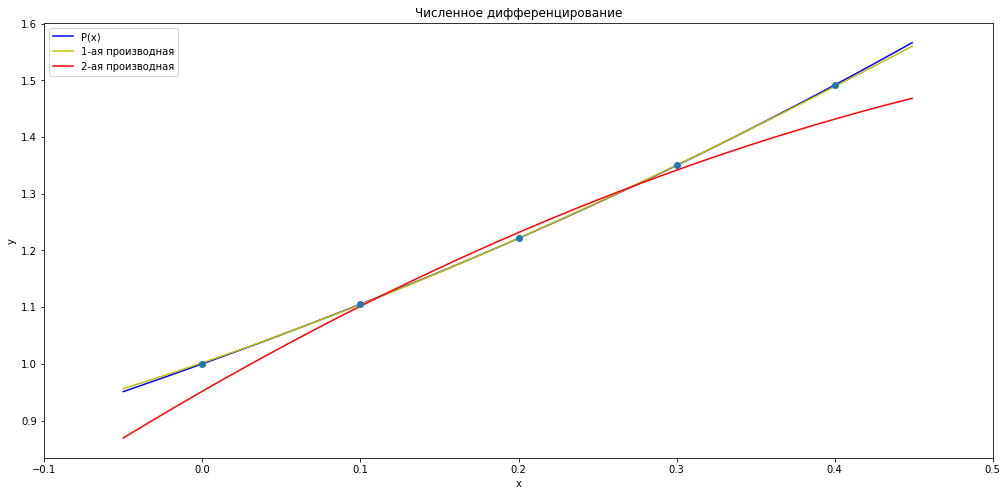

In [9]:
x = np.arange(-0.05, 0.45, 0.001)

Pn = newton_interpol(Xi, Yi)
Pn1 = newton_n_differ(Xi, Yi, 1)
Pn2 = newton_n_differ(Xi, Yi, 2)

y = list(map(Pn, x)) 
y1 = list(map(Pn1, x))
y2 = list(map(Pn2, x)) 

fig = plt.figure(figsize=(17, 8))
ax1 = fig.add_subplot(111)

line1, = ax1.plot(x, y, 'b')
line2, = ax1.plot(x, y1, 'y')
line3, = ax1.plot(x, y2, 'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax1.plot(list(Xi), list(Yi), 'o', label = "Points")

# set title, plot limits, etc
plt.title('Численное дифференцирование')
plt.xlim(-0.1, 0.5)


# add a legend, and position it on the upper right
plt.legend((line1, line2, line3), ("P(x)", "1-ая производная", "2-ая производная"))

plt.show()

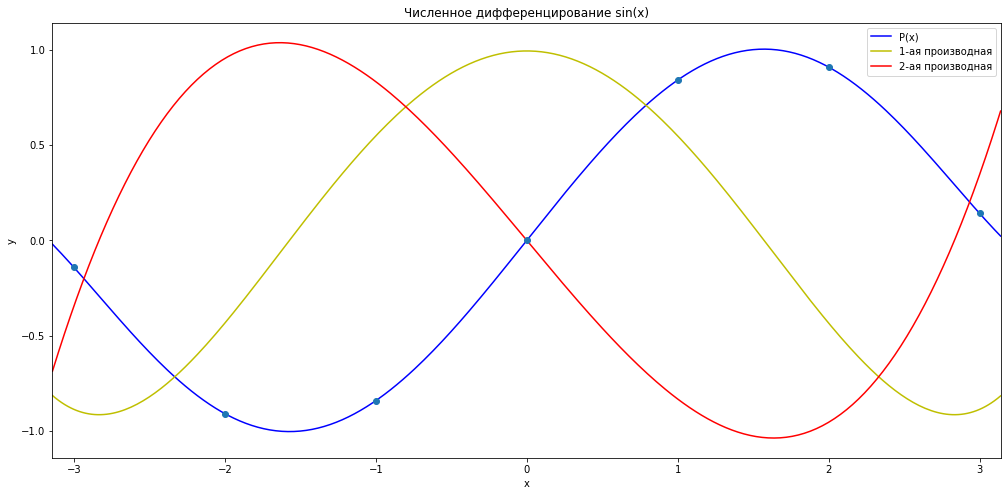

In [10]:
x = np.arange(-math.pi, math.pi, 0.02)

Xi = list(np.arange(-3, 3.1, 1.5))
Yi = list(map(lambda t: math.sin(t), Xi))

Pn = newton_interpol(Xi, Yi)
Pn1 = newton_n_differ(Xi, Yi, 1)
Pn2 = newton_n_differ(Xi, Yi, 2)

y = list(map(Pn, x)) 
y1 = list(map(Pn1, x))
y2 = list(map(Pn2, x))


fig = plt.figure(figsize=(17, 8))
ax1 = fig.add_subplot(111)

line1, = ax1.plot(x, y, 'b')
line2, = ax1.plot(x, y1, 'y')
line3, = ax1.plot(x, y2, 'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax1.plot(list(Xi), list(Yi), 'o', label = "Points")

# set title, plot limits, etc
plt.title('Численное дифференцирование sin(x)')
plt.xlim(-math.pi, math.pi)


# add a legend, and position it on the upper right
plt.legend((line1, line2, line3), ("P(x)", "1-ая производная", "2-ая производная"))

plt.show()

###### <center>Сделано Бронниковым Максимом</center>
###### <center>01.04.2020</center>